# Train / Test
We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

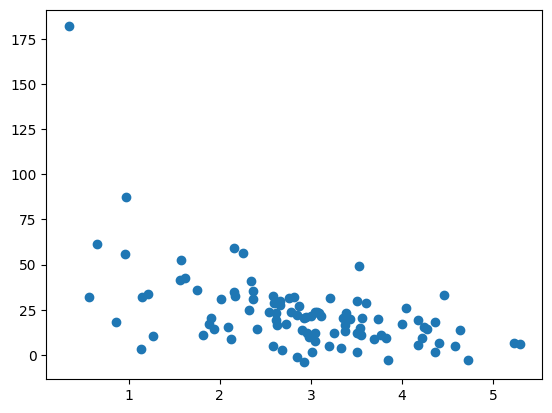

In [4]:
np.random.seed(2) #define a semente do gerador de numeros 

pageSpeeds = np.random.normal(3.0, 1.0, 100) # Cria um array de 100 números aleatorias
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds #cria uma relacao inversa entre a velocidade da pagina e os valores de compra

scatter(pageSpeeds, purchaseAmount) # plota um grafico

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [5]:
trainX = pageSpeeds[:80]#separa os 80 primeiros valores para treino
testX = pageSpeeds[80:]#separa os 80 restantes valores para teste

trainY = purchaseAmount[:80]#separa os 80 primeiros valores para o conjunto de treinamento
testY = purchaseAmount[80:]#separa os 80 restantes valores para o conjunto de teste

Here's our training dataset:

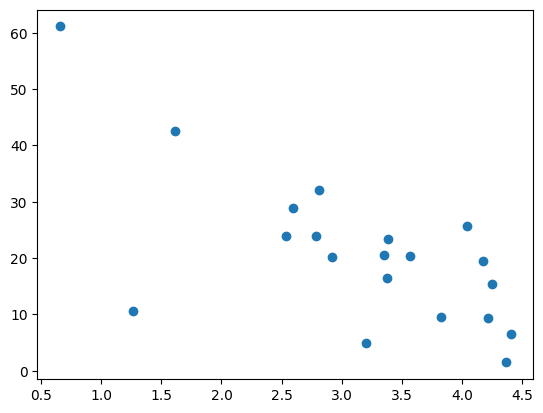

In [6]:
scatter(testX, testY)# Grafico de dispersao usando os dados de teste

And our test dataset:

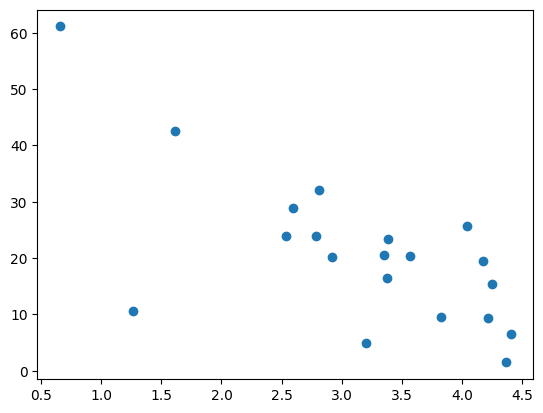

In [7]:
scatter(testX, testY)#grafico de dispersao usando os dados de teste

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [9]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8)) # Plota os dois em um grafico de polinomio 8

Let's plot our polynomial against the training data:

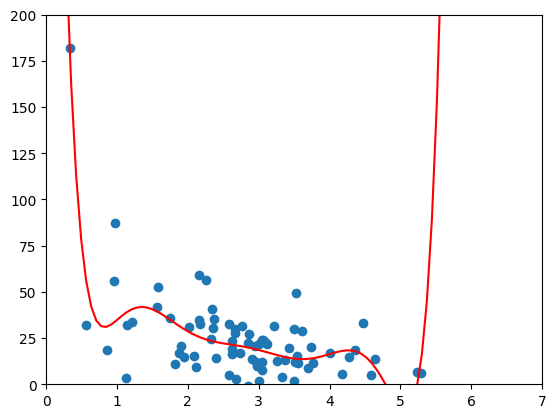

In [11]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)  # Cria 100 pontos igualmente espaçados
axes = plt.axes()  #vonfigura os eixos do graficos
axes.set_xlim([0, 7])  #fefine o limite do eixo X 
axes.set_ylim([0, 200])  #define o limite do eixo Y 
plt.scatter(x, y)  # Plota os pontos de dados 
plt.plot(xp, p4(xp), c='r')  #lota a curva ajustada do polinomio sobre os dados usando a cor vermelha
plt.show()  #Exibe o grafico gerado

And against our test data:

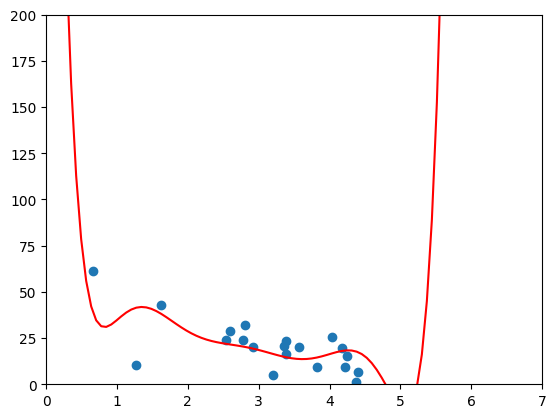

In [12]:
testx = np.array(testX) # Fransforma os dados de teste de velocidades 
testy = np.array(testY)#Transforma os dados de teste de valores de array 

axes = plt.axes()#configura os eixos do graficos
axes.set_xlim([0, 7])#define o limite do eixo 
axes.set_ylim([0, 200]) #define o limite do eixo
plt.scatter(testx, testy)  # Plota os pontos de teste como um grafico de dispersao
plt.plot(xp, p4(xp), c='r')  #lota a curva ajustada do polinomio sobre os dados de teste usando a cor vermelha
plt.show() 

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [13]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))#calcula o valor de Rˆ2

print(r2) #printa ele

0.30018168611498663


In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))# Calcula o Rˆ2

print(r2) #orinta o valor

0.6427069514691666
